In [91]:
# Importing necessary libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')


In [92]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})
# Replacing unavailable data with a missing value that pandas is able to understand

<Axes: xlabel='survived', ylabel='fare'>

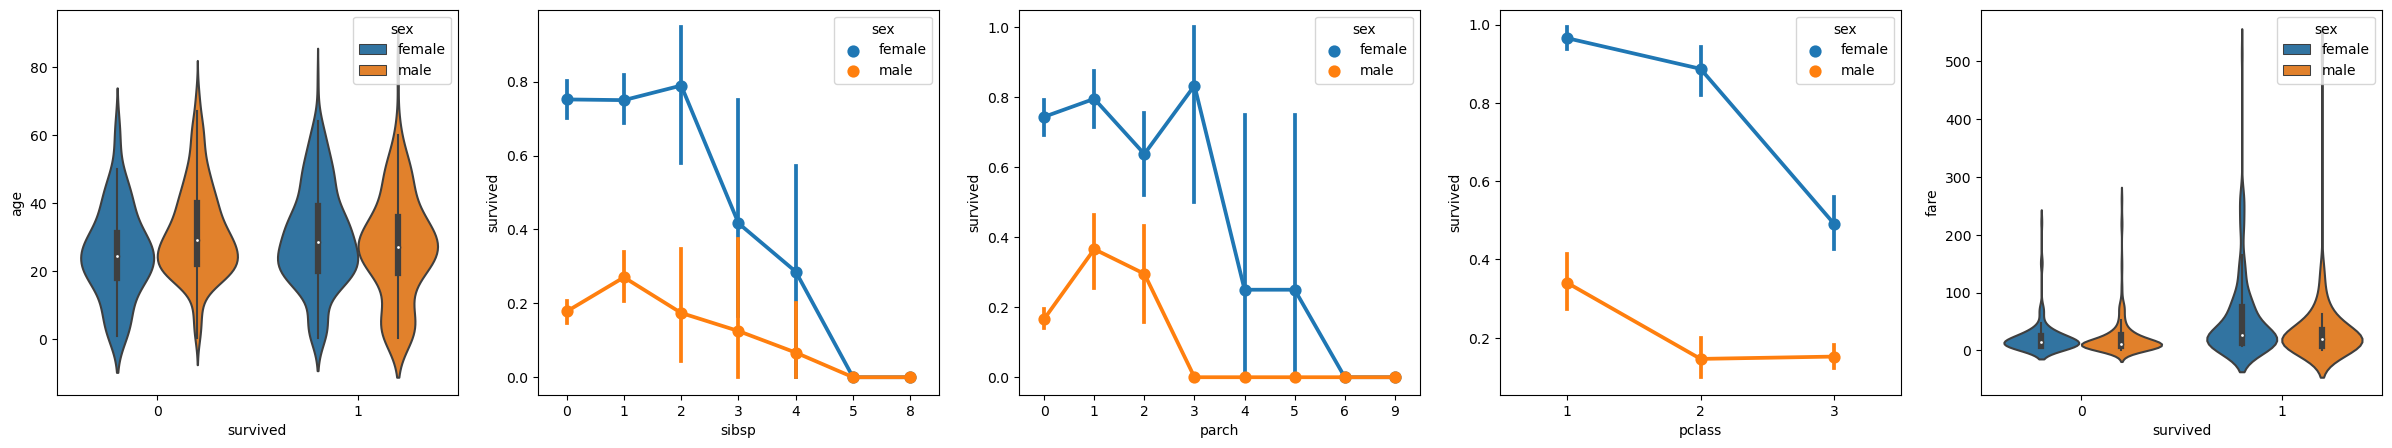

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])
# Generating plots to see how certain columns of the dataset relate to survivability

In [94]:
data.replace({'male': 1, 'female': 0}, inplace=True)
# Converting string values to integers for the correlation calculation

In [95]:
data.corr(numeric_only=True).abs()[["survived"]]
# Correlating the relationship between all variables and survival

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [96]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]
# Relating two similar variables to see if combined they have a higher correlation to survivability

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [97]:
data = data[['sex', 'pclass', 'age', 'relatives', 'fare', 'survived']].dropna()
# Dropping from the dataset the low values that most likely do not have any correlation

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex', 'pclass', 'age', 'relatives', 'fare']], data.survived, test_size=0.2, random_state=0)
# Splitting up the data

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
# Normalizing the inputs, or reorganizing the data set to remove unstructured data

In [100]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
# Creating the machine learning algorithm to model the data

GaussianNB()

In [101]:
from sklearn import metrics
predict_test = model.predict(x_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [102]:
# Now going to compare result of the test data from the trained algorithm with result of a neural network
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [103]:
model.add(Dense(5, kernel_initializer= 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer= 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer= 'uniform', activation = 'sigmoid'))
# Creating the layers of the neural network

In [104]:
model.summary()
# To look at summary of the model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 30        
                                                                 
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=50)
# Setting the arguments such as optimizer, loss function, and metrics

Epoch 1/50
27/27 [==============================] - 1s 1ms/step - loss: 0.6922 - accuracy: 0.5861
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5873
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6751 - accuracy: 0.6232
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.7356
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.7739
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.7703
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.7679
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7775
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5242 - accuracy: 0.7775
Epoch 11/50
27/27 [

In [106]:
y_pred = np.rint(model.predict(x_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))
# Working the model against the test data

7/7 [==============================] - 0s 2ms/step
0.784688995215311
